In [ ]:
"""
# Jesús Bautista Villar <jesbauti20@gmail.com>
- Source seeking simulations (distributed computing) -
"""

In [ ]:
# If executed from Google Colab --------------------------------------------------------
# !git clone https://github.com/jesusBV20/source_seeking_distr.git
# !rsync -a source_seeking_distr/ .
# !rm -r source_seeking_distr

# If you want to use latex with matplotlib ---------------------------------------------
# !apt install -y texlive texlive-latex-extra texlive-fonts-recommended dvipng cm-super
# !pip install -y latex

In [1]:
import numpy as np
import os

# Graphic tools
import matplotlib.pyplot as plt
from matplotlib.legend import Legend # legend artist
from matplotlib import ticker

# -------------------------------------------------------------------------------------
# Import from the Swarm Systems Lab Simulator

# Tell matplotlib to use latex
from ssl_simulator.visualization import set_paper_parameters
set_paper_parameters(fontsize=12)

# Main utility functions used along the notebook
from ssl_simulator import create_dir, add_src_to_path
from ssl_simulator.math import XY_distrib, regpoly_formation, gen_Z_random, gen_Z_split
from ssl_simulator.visualization import vector2d, unicycle_patch

# Scalar field functions
from ssl_simulator.components.scalar_fields import ScalarField
from ssl_simulator.components.scalar_fields import SigmaGauss, SigmaNonconvex, SigmaFract 
from ssl_simulator.components.scalar_fields import PlotterScalarField

# -------------------------------------------------------------------------------------
# Import custom functions and classes (src in path is requiered)
add_src_to_path("")

from sim_core.visualization import PlotProp1, PlotProp2
from sim_core.visualization import plot_centroid_estimation, plot_mu_estimation

# -------------------------------------------------------------------------------------
# Define constants for file paths
OUTPUT_DIR = os.path.join("..", "output")
create_dir(OUTPUT_DIR)

The directory '../output' already exists!


## Proposition 1 figure 

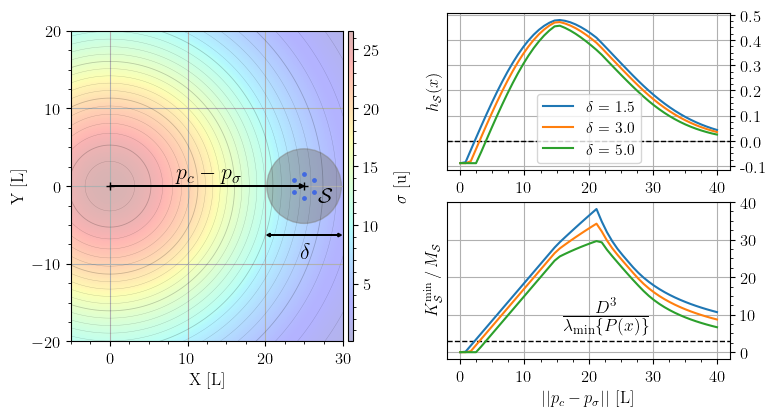

In [3]:
# --- PROPOSITION 1

N = 6
p = regpoly_formation(N,1.5) * np.array([1,1])
# print("D =", np.max(np.linalg.norm(p, axis=1)))

# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------
mu = [0,0]
max_int = 1000
dev = 15

scalar_field = SigmaGauss(mu=mu, max_intensity=max_int, dev=dev)

# ----------------------------------------------------------------------
# PAPER PLOT
# ----------------------------------------------------------------------

prop1 = PlotProp1(p, scalar_field)
prop1.compute_example(dist_range=[0,40], delta_list=[1.5,3,5], its=50)
prop1.plot(dpi=100, figsize=(8.5,4.5), xlim=[-5,30], ylim=[-20,20])

## Proposition 2 figure

X 100.0 1250.0000000000075 1250.0 1250.0


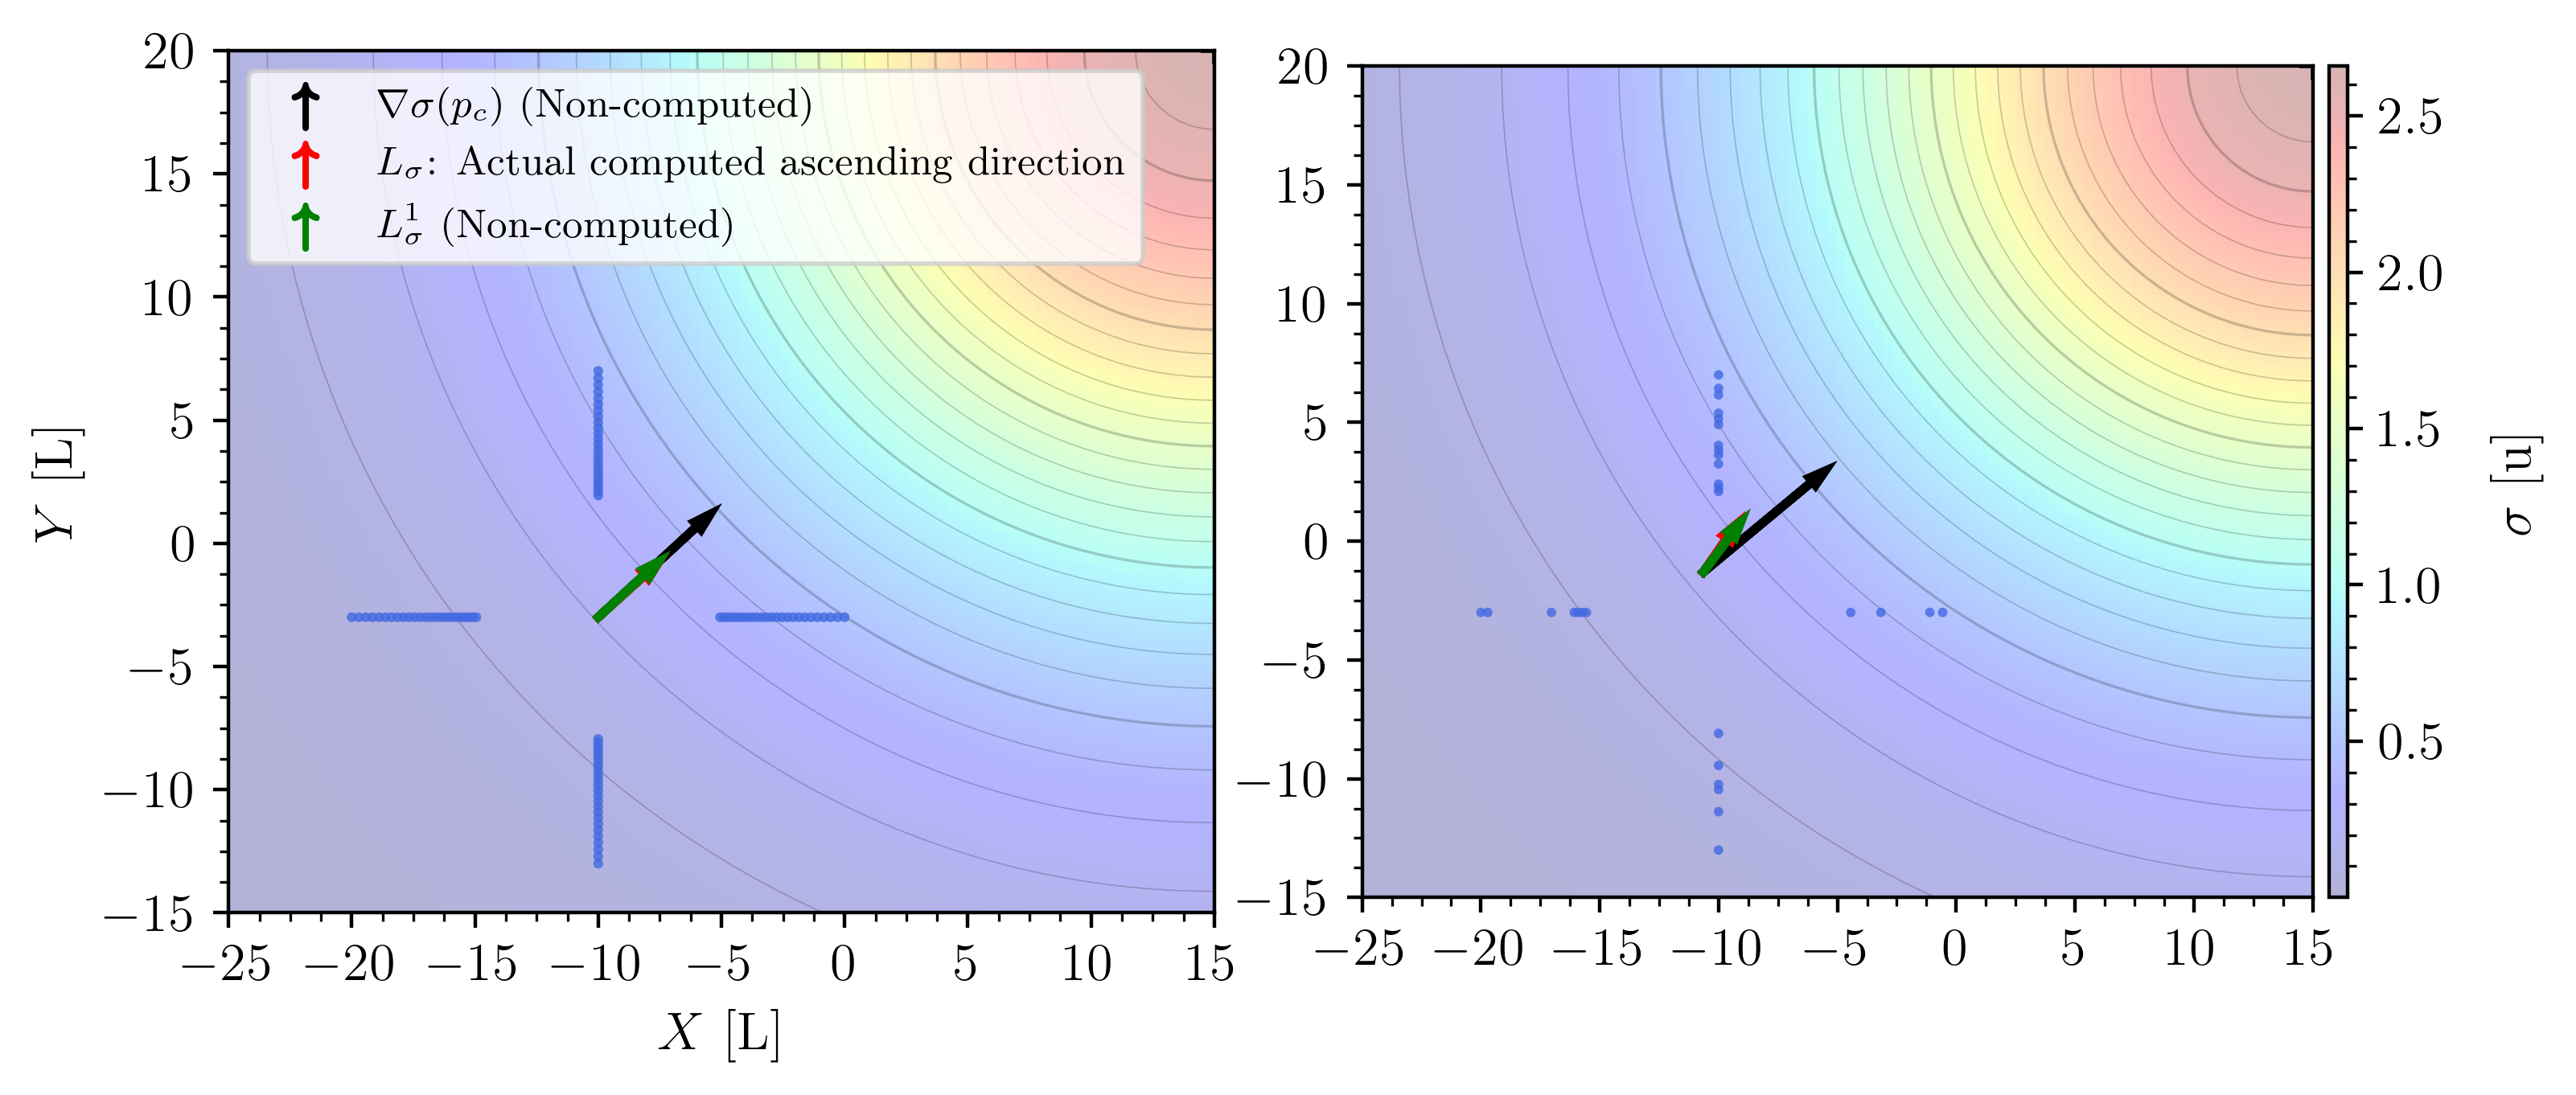

In [2]:
# --- PROPOSITION 2 
  
p0 = np.array([-10,-3])

nx, ny = 50, 50
lx, ly = 10, 10

# ----------------------------------------------------------------------
# PAPER PLOT
# ----------------------------------------------------------------------

prop2 = PlotProp2(p0, nx, ny, lx, ly)

# Generate the plot
fig = plt.figure(figsize=(8.5,4.5), dpi=400)
ax1, ax2  = fig.subplots(1,2)
plt.subplots_adjust(wspace=0.15)

# Axis configuration
step = 5

ax1.set_xlim([-25,15])
ax1.set_ylim([-15,20])
ax1.set_xlabel(r"$X$ [L]")
ax1.set_ylabel(r"$Y$ [L]")
ax1.set_aspect("equal")
ax1.grid(True)

ax1.xaxis.set_major_locator(ticker.MultipleLocator(step))
ax1.xaxis.set_minor_locator(ticker.MultipleLocator(step / 4))
ax1.yaxis.set_major_locator(ticker.MultipleLocator(step))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(step / 4))

ax2.set_xlim([-25,15])
ax2.set_ylim([-15,20])
ax2.set_aspect("equal")
# ax2.set_yticklabels([])
ax2.grid(True)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(step))
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(step / 4))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(step))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(step / 4))

# Plot the simulation
prop2.plot(fig, ax1, n_rm=0, title_sw=False, cbar_sw=False)
prop2.plot(fig, ax2, n_rm=70, title_sw=False, legend_sw=False)

# Show the plot!
plt.show()

## Distributed estimation (Simulation figure)

1
pc:[ 0.09362313 -0.20792935], p1:[ 1.19847218 -0.14399775], xhat1:[0. 0.], pc1:[ 1.19847218 -0.14399775]
7
pc:[ 0.09362313 -0.20792935], p1:[ 1.19847218 -0.14399775], xhat1:[1.11436381 0.06740503], pc1:[ 0.08410837 -0.21140277]
15
pc:[ 0.09362313 -0.20792935], p1:[ 1.19847218 -0.14399775], xhat1:[1.1066789  0.06477561], pc1:[ 0.09179328 -0.20877335]


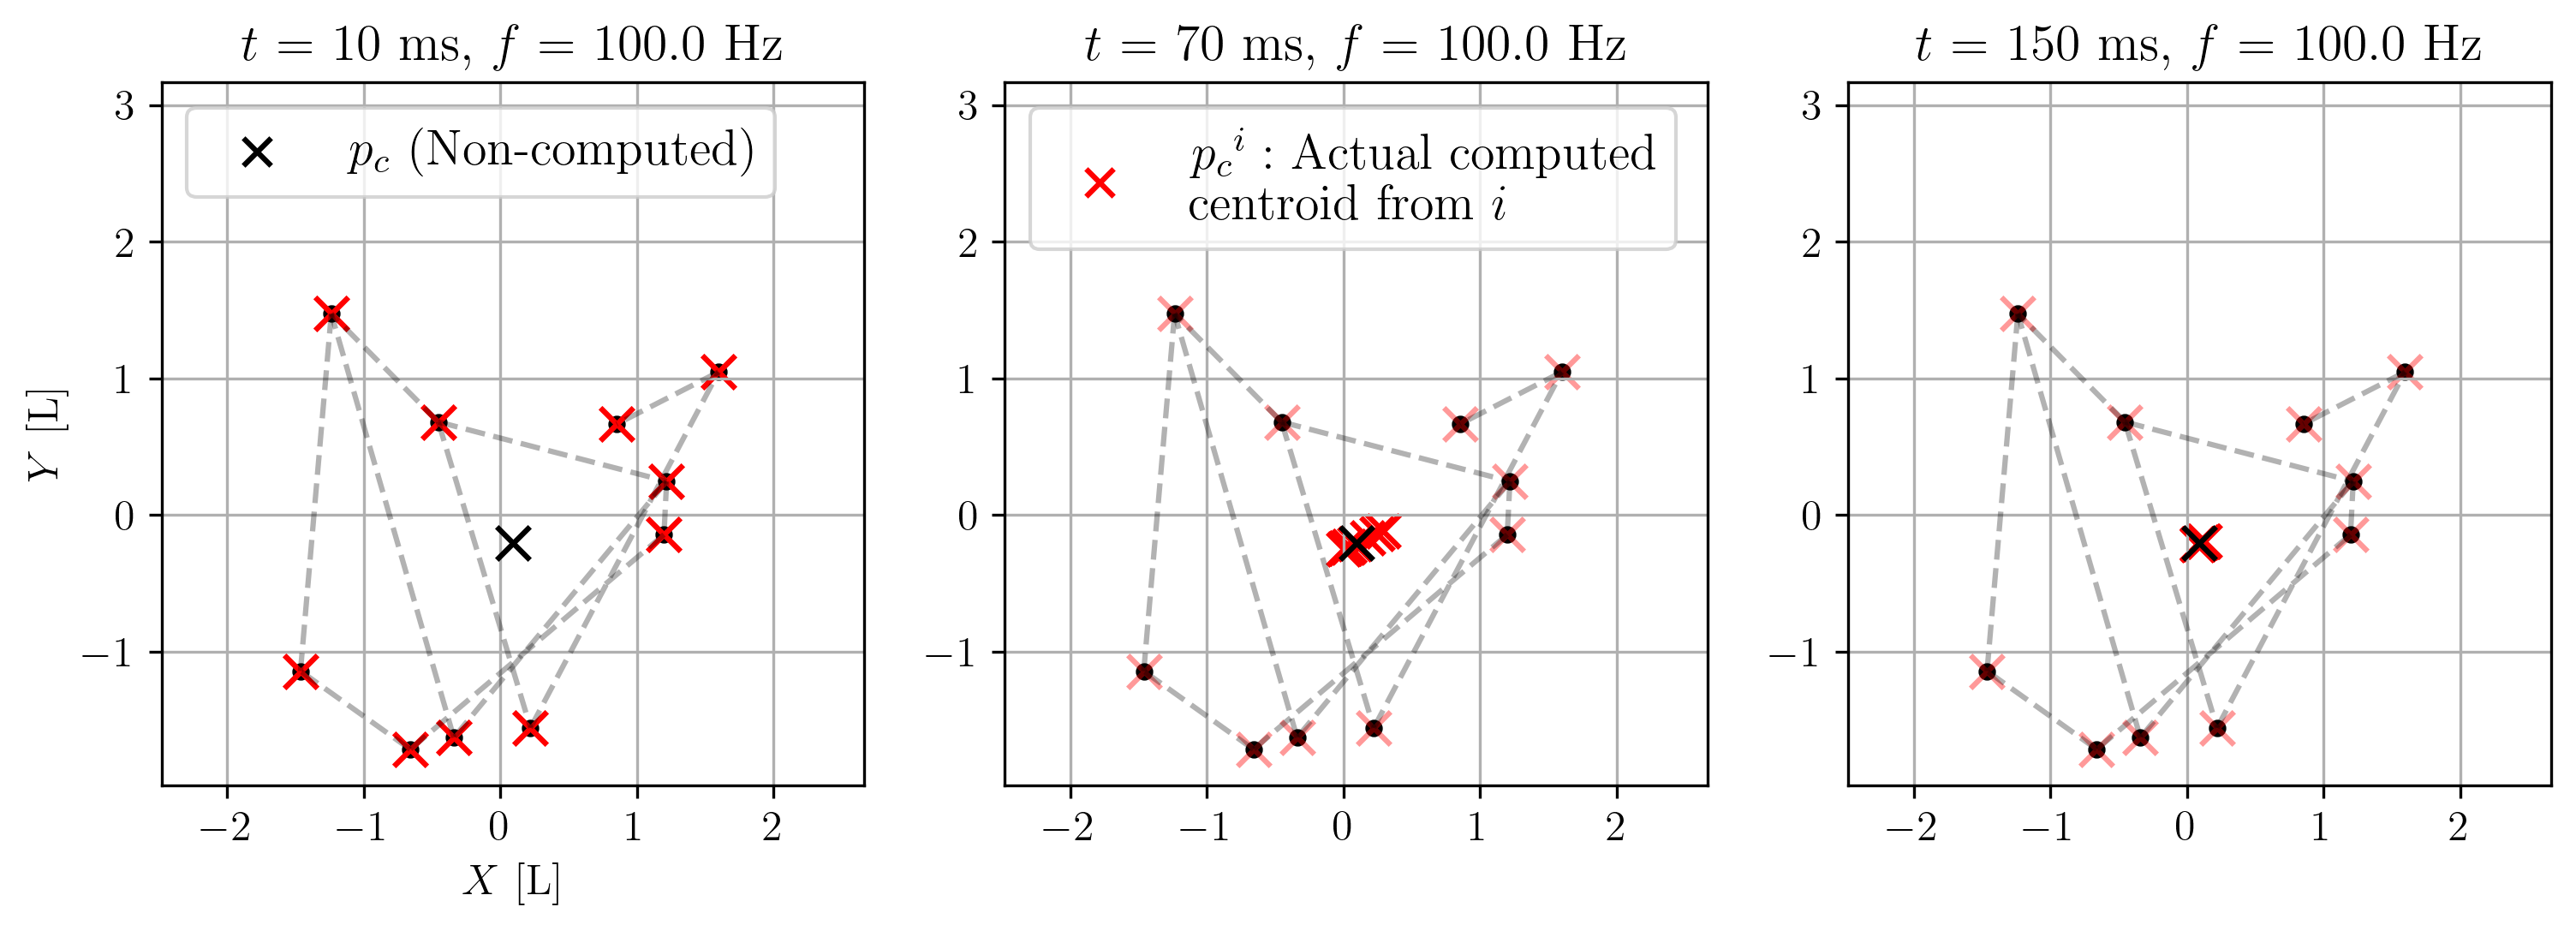

In [2]:
## Parameters #####
pc = np.array([0,0])
lims = np.array([2,1.8])

np.random.seed(902025)

N = 10
p = XY_distrib(N,pc,lims)
Z = [(0, 3), (0, 9), (3, 6), (0, 8), (8, 5), (6, 7), (1, 4), (4, 2), (8, 1), (9, 2), (5, 9)]

dt = 0.01
its = 1 # iterations per dt

# --------------------------------------------------------------------------------------
# Plotting
# --------------------------------------------------------------------------------------

fig = plt.figure(figsize=(12, 8), dpi=300)
axes  = fig.subplots(1,3)

plot_centroid_estimation(axes[0], p, Z, dt=dt, tf=0.01, its=its, legend_fs=9, sz=40, lw=1.5,
                         legend=False,xlab=True,ylab=True)
plot_centroid_estimation(axes[1], p, Z, dt=dt, tf=0.07, its=its, legend_fs=9, sz=40, lw=1.5)
plot_centroid_estimation(axes[2], p, Z, dt=dt, tf=0.15, its=its, legend_fs=9, sz=40, lw=1.5)

for ax in axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_ylim(np.array(ax.get_ylim())*1+0.8)

# Generate the legend
mrk1 = plt.scatter([],[],c="k"  ,marker="x",s=60)
mrk2 = plt.scatter([],[],c="red",marker="x",s=60)

leg1 = Legend(axes[0], [mrk1], 
            [r"$p_c$ (Non-computed)"],
            loc="upper left", prop={"size": 14}, ncol=1)

leg2 = Legend(axes[1], [mrk2], 
            [r"${p_{c}}^i:$ " + "Actual computed\ncentroid from $i$"],
            loc="upper left", prop={"size": 14}, ncol=1)

axes[0].add_artist(leg1)
axes[1].add_artist(leg2)

# Show the plot!
plt.show()

10
15
32


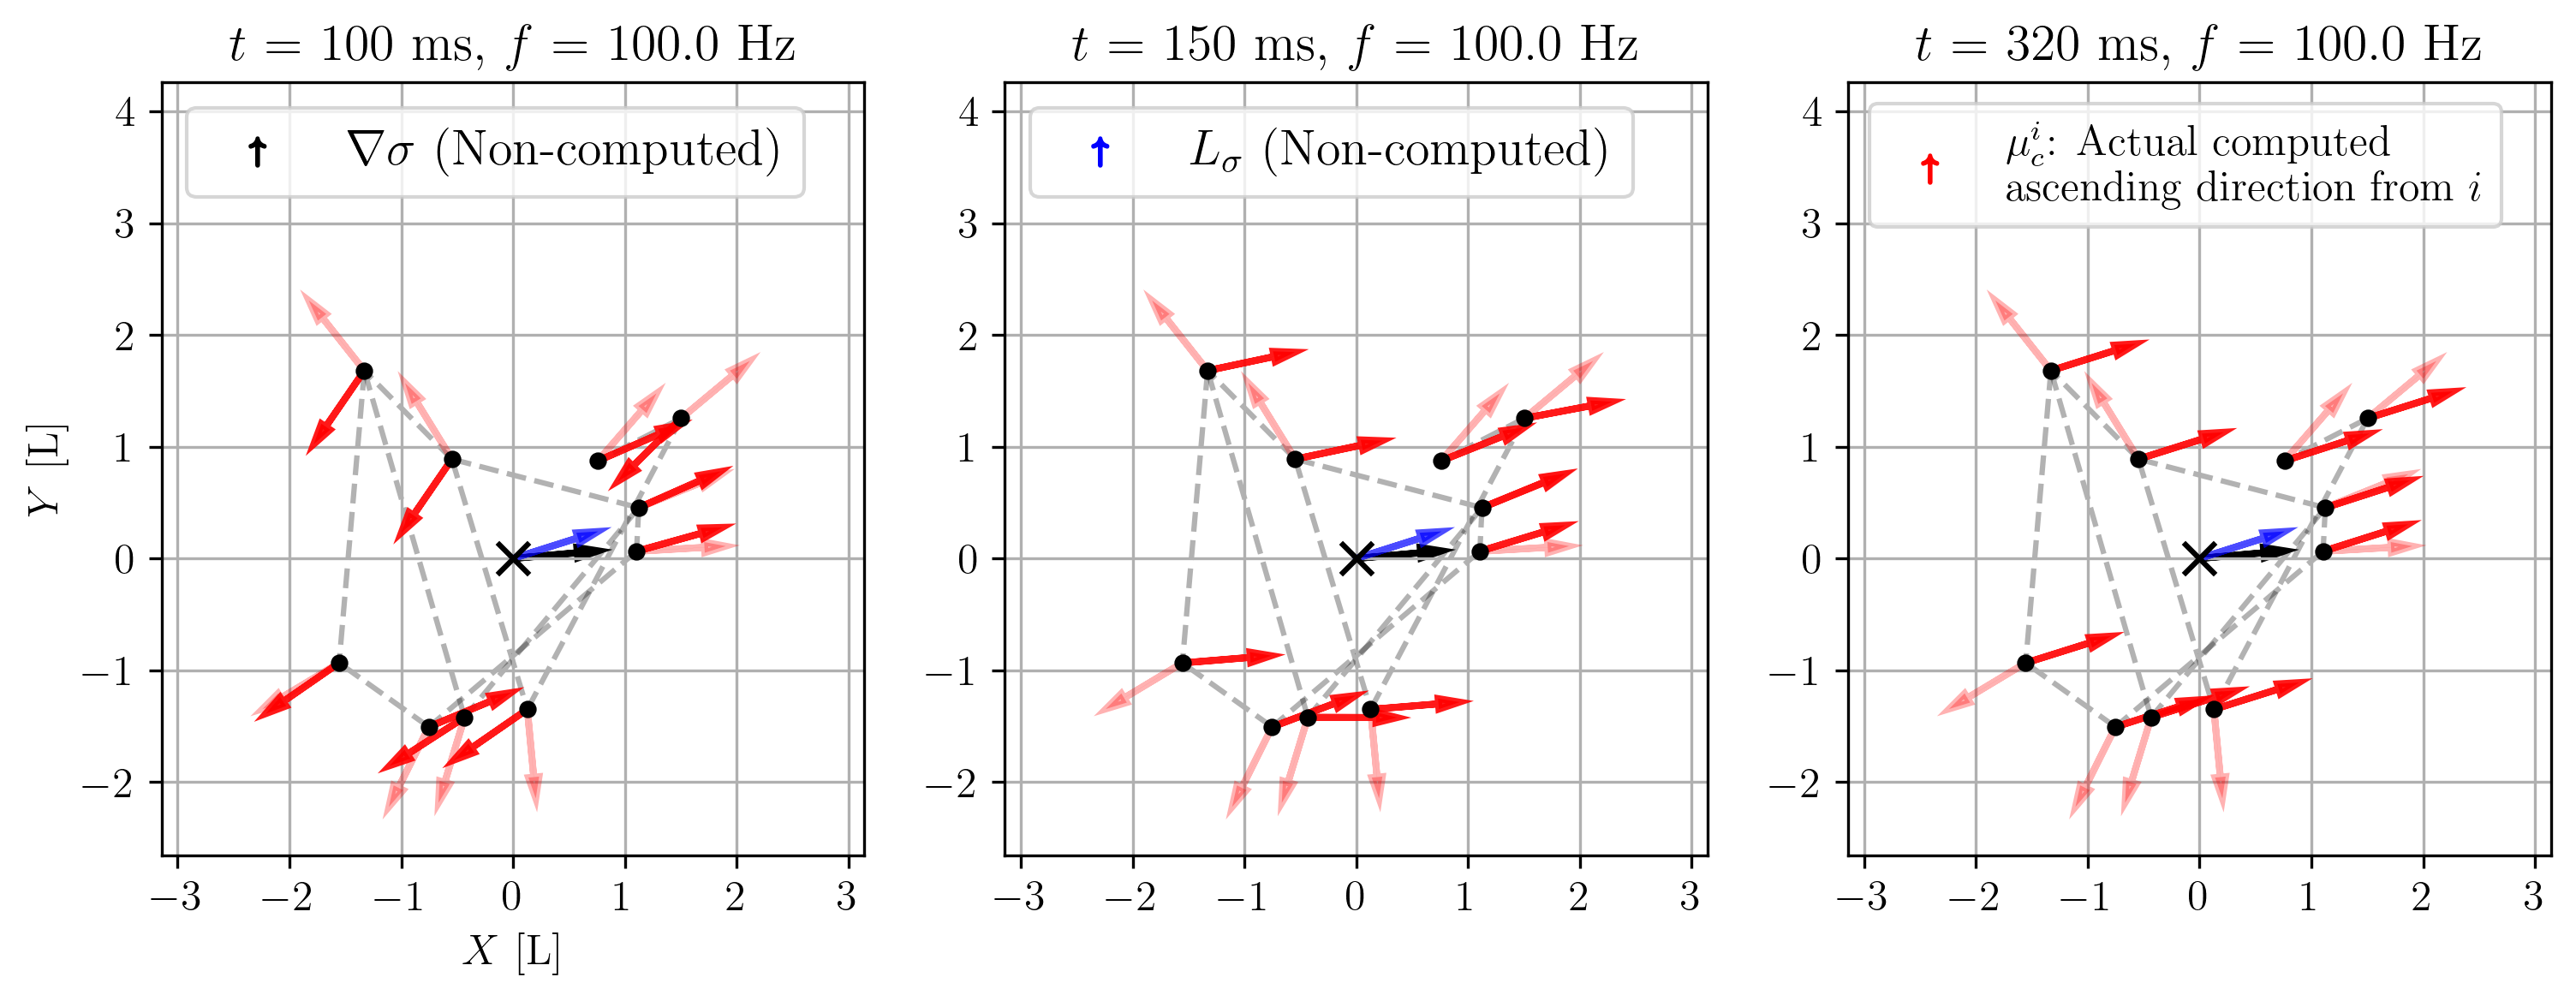

In [3]:
## Parameters #####
pc = np.array([0,0])
lims = np.array([2,2])

np.random.seed(1221)

N = 10
# p = XY_distrib(N,pc,lims)
p = p - np.sum(p, axis=0)/N
Z = [(0, 3), (0, 9), (3, 6), (0, 8), (8, 5), (6, 7), (1, 4), (4, 2), (8, 1), (9, 2), (5, 9)]

dt = 0.01
its = 1 # iterations per dt

# ----------------------------------------------------------------------
# Generating the scalar field
# ----------------------------------------------------------------------
n = 2
max_int = 20
mu = [10,20]
dev = 10

scalar_field = SigmaNonconvex(k=0.04, dev=dev, mu=mu)

# ----------------------------------------------------------------------
# Plotting
# ----------------------------------------------------------------------

fig = plt.figure(figsize=(12, 8), dpi=300)
ax  = fig.subplots(1,3)

# plot_mu_estimation(ax[0], p, Z, scalar_field, dt=dt, tf=0.1, its=its, k=0.1, 
#                          legend=True,xlab=True,ylab=True)
# plot_mu_estimation(ax[1], p, Z, scalar_field, dt=dt, tf=0.1, its=its, k=0.3)
# plot_mu_estimation(ax[2], p, Z, scalar_field, dt=dt, tf=0.1, its=its, k=1)

plot_mu_estimation(ax[0], p, Z, scalar_field, dt=dt, tf=0.10, its=its, 
                         legend=False,xlab=True,ylab=True)
plot_mu_estimation(ax[1], p, Z, scalar_field, dt=dt, tf=0.15, its=its)
plot_mu_estimation(ax[2], p, Z, scalar_field, dt=dt, tf=0.32, its=its)

arrs = [plt.scatter([],[],c="k",marker=r"$\uparrow$",s=60),
        plt.scatter([],[],c="blue",marker=r"$\uparrow$",s=60),
        plt.scatter([],[],c="red",marker=r"$\uparrow$",s=60)]

labels = [r"$\nabla\sigma$ (Non-computed)",
          r"$L_\sigma$ (Non-computed)",
          r"$\mu_c^i$:" + " Actual computed\nascending direction from $i$"]
          
for i,axi in enumerate(ax):
    axi.xaxis.set_major_locator(ticker.MultipleLocator(1))
    axi.yaxis.set_major_locator(ticker.MultipleLocator(1))

    if i == 2:
        fs = 12
    else:
        fs = 14

    leg = Legend(axi, [arrs[i]], [labels[i]], loc="upper left", prop={"size": fs}, ncol=1)
    axi.add_artist(leg)
    axi.set_ylim(np.array(axi.get_ylim())*1.1+0.8)

# Show the plot!
plt.show()

## Auxiliary plots

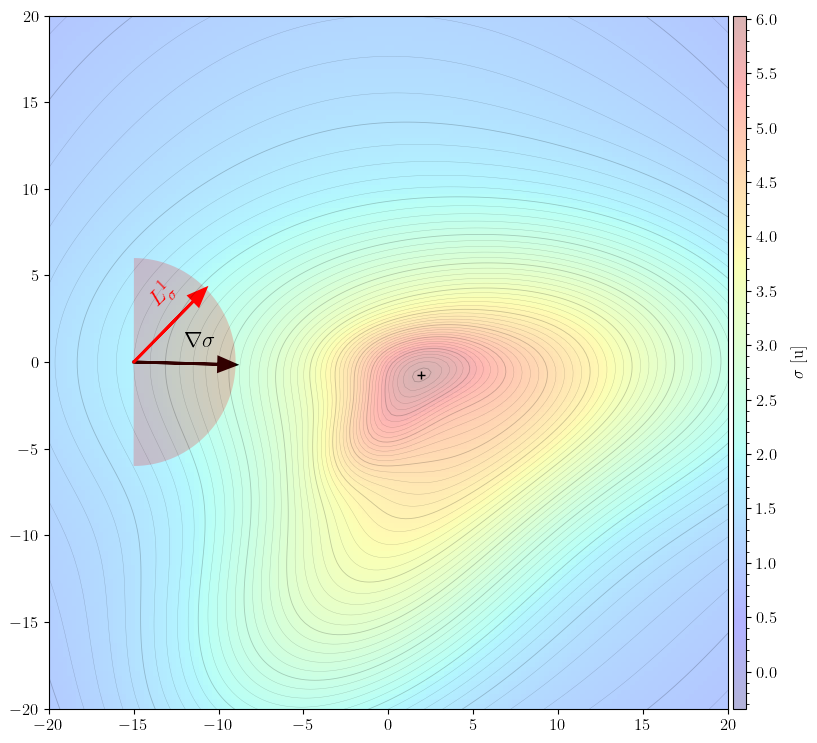

In [4]:
# Figure to compare the actual gradient with L^1
# ----------------------------------------------

from ssl_simulator.math import R_2D_matrix

xy_arr = [-15,0]
r_arc = 6

psi = 0 * np.pi / 180

# Generate the scalar field
scalar_field = SigmaFract(k=0.04, dev=[7,2], mu=[0,0])
scalar_field.transf_w = psi

# Generate the plot
fig = plt.figure(figsize=(9, 9), dpi=100)
ax = fig.subplots()
ax.set_xlim([-20,20])
ax.set_ylim([-20,20])

# Draw the scalar field
scalar_field_plotter = PlotterScalarField(scalar_field)
scalar_field_plotter.draw(fig=fig, ax=ax, xlim=40, ylim=40, n=300, contour_levels=10)

# Draw multiple gradients
kw_arr = {"s":r_arc, "lw":2, "hw":0.8, "hl":1}

arr_quiv = scalar_field_plotter.draw_grad(xy_arr, ax, ret_arr=False, norm_fct=1, **kw_arr)
vector2d(ax, xy_arr, [np.cos(np.pi/4), np.sin(np.pi/4)], c="red", **kw_arr)

# Draw the blue shape
t_i = np.arctan2((arr_quiv[1]-xy_arr[1]), (arr_quiv[0]-xy_arr[0]))-np.pi/2
t = np.linspace(t_i, t_i+np.pi, 200)
xr, yr = xy_arr[0] + r_arc*np.cos(t), xy_arr[1] + r_arc*np.sin(t)
ax.fill(xr, yr, c="red", alpha=0.2, lw=0)

# Text
ax.text(xy_arr[0]+3, xy_arr[1]+0.8, r"$\nabla\sigma$", fontsize=16, rotation=0)
ax.text(xy_arr[0]+0.7, xy_arr[1]+3.3, r"$L_\sigma^1$", fontsize=16, rotation=180/4, color="red")

plt.show()